import pandas as it is required

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


import wrangled data

In [11]:
data_frame = pd.read_csv("wrangled_data.csv")
winrate_df = pd.read_csv("wrangled_data.csv")

In [12]:
from datetime import datetime, timedelta

# Assuming your dataset has a column named 'date' with datetime strings
winrate_df['date'] = pd.to_datetime(winrate_df['date'])  # Convert to datetime object

# Get the current date and calculate the date one month ago
current_date = datetime.now()
one_month_ago = current_date - timedelta(days=20)  # Use 30 days for a full month

# Filter data for the past month
winrate_fdf = winrate_df[
    (winrate_df['date'] >= one_month_ago) &
    (winrate_df['date'] <= current_date)
]

# Group by 'rb_lower_br' and 'nation' and calculate the average win rate
avgwr_grouped = winrate_fdf.groupby(['rb_lower_br', 'nation'])['rb_win_rate'].mean().reset_index()
avgwr_grouped.rename(columns={'rb_win_rate': 'avgwr'}, inplace=True)

# Merge the average win rate back into the main data frame
data_frame = data_frame.merge(avgwr_grouped, on=['rb_lower_br', 'nation'], how='left')


In [13]:
# Calculate Combined1
data_frame['Combined1'] = (
    (data_frame['rb_ground_frags_per_battle'] * 0.666 + data_frame['rb_ground_frags_per_death'] * 0.333)
) + (data_frame['rb_win_rate'] - 0.5)
data_frame.describe()



,rb_lower_br,rb_battles_sum,rb_battles_mean,rb_win_rate,rb_air_frags_per_battle,rb_air_frags_per_death,rb_ground_frags_per_battle,rb_ground_frags_per_death,avgwr,Combined1
count,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9062.000000,9096.000000
mean,6.656629,8941.572230,940.909538,0.564321,0.081292,0.082280,0.139241,0.362533,0.558876,0.277780
std,3.230786,10399.018281,1174.008139,0.101837,0.077925,0.077182,0.064028,0.131522,0.109781,0.151431
min,1.000000,42.000000,5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154824,-0.454396
25%,4.000000,1909.000000,249.038733,0.511107,0.016784,0.016169,0.101822,0.270669,0.503095,0.188870
50%,6.700000,4968.000000,599.992389,0.580167,0.069841,0.067517,0.127968,0.346084,0.578684,0.279883
75%,9.300000,11764.000000,1110.226207,0.627991,0.119100,0.126843,0.166398,0.441872,0.625308,0.365941
max,12.000000,62213.000000,11051.000000,0.849426,0.738555,0.568807,1.000000,1.000000,0.788136,1.254623


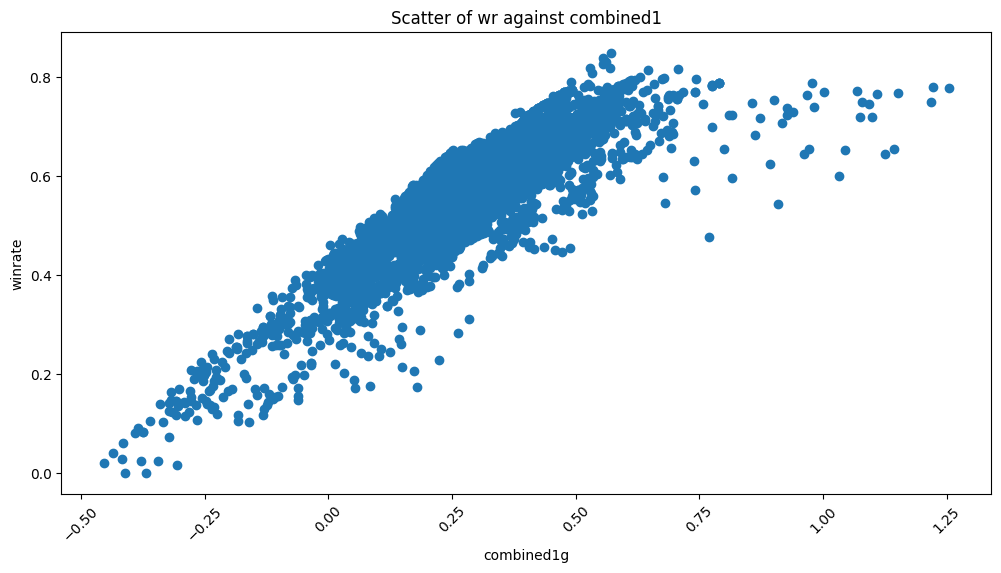

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(data_frame['Combined1'], data_frame['rb_win_rate'])
plt.title("Scatter of wr against combined1")
plt.xlabel('combined1g')
plt.ylabel('winrate')
plt.xticks(rotation=45)
plt.show()

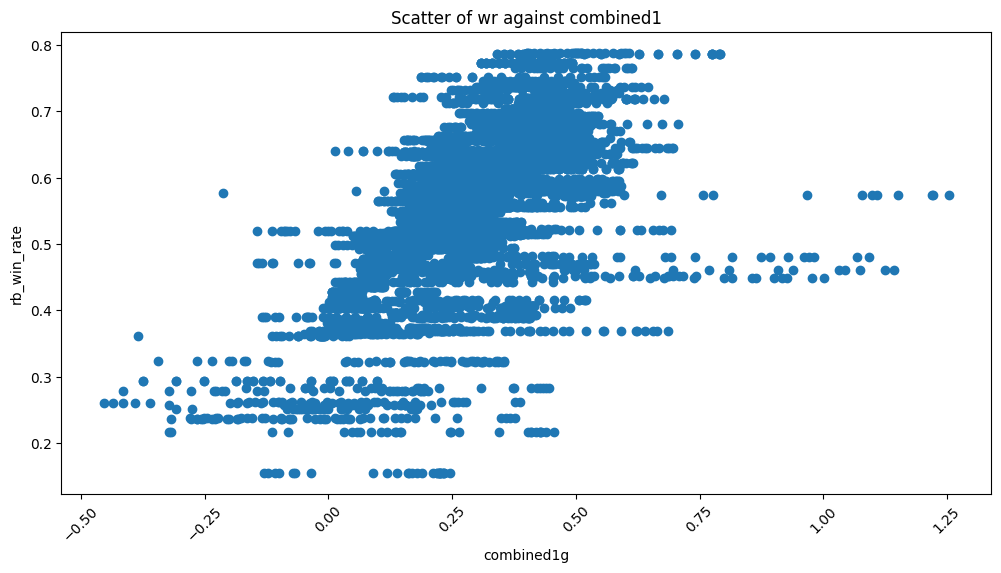

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(data_frame['Combined1'], data_frame['avgwr'])
plt.title("Scatter of wr against combined1")
plt.xlabel('combined1g')
plt.ylabel('rb_win_rate')
plt.xticks(rotation=45)
plt.show()

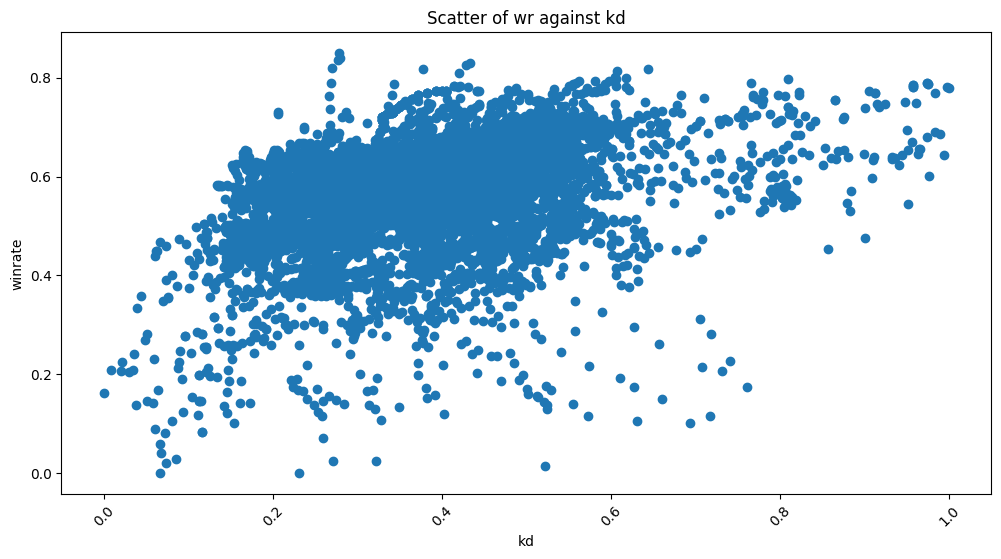

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(data_frame['rb_ground_frags_per_death'], data_frame['rb_win_rate'])
plt.title("Scatter of wr against kd")
plt.xlabel('kd')
plt.ylabel('winrate')
plt.xticks(rotation=45)
plt.show()

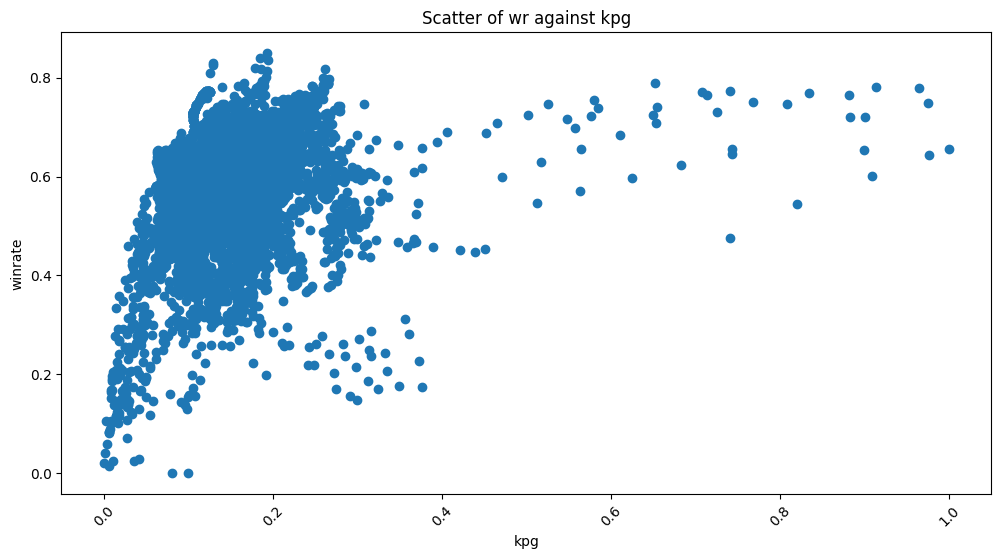

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(data_frame['rb_ground_frags_per_battle'], data_frame['rb_win_rate'])
plt.title("Scatter of wr against kpg")
plt.xlabel('kpg')
plt.ylabel('winrate')
plt.xticks(rotation=45)
plt.show()

save new data to file called model_ready_data.csv

In [18]:
data_frame.to_csv('../3.Model Training/model_ready_data.csv', index=False)